<div style="border:solid Blue 2px; padding: 40px">
<h1> Планирование рекламной кампании на будущий год</h1>
     
    
 - Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
     
 - Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 
    
- Посмотрим и оценим сколько игр и на каких основных площадках они выпускались, популярность отдельных жарнов для разных стран и возрастов - зная это попробуем спрогнозировать спрос на будущий год.
    
</div>

<div style="border:solid Green 2px; padding: 40px">
<h1>Описание данных</h1>

    
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
 
(Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.)
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4701,Cars: Race-O-Rama,PSP,2009.0,Racing,0.29,0.07,0.00,0.06,NaN,tbd,E
11602,Sub Rebellion,PS2,2002.0,Simulation,0.04,0.03,0.00,0.01,71.0,tbd,T
12861,Shining Force III: Scenario 2,SAT,1998.0,Strategy,0.00,0.00,0.05,0.00,NaN,NaN,NaN
5601,My Baby: First Steps,DS,2009.0,Simulation,0.27,0.03,0.00,0.02,NaN,tbd,E
14527,Take On Helicopters,PC,2011.0,Simulation,0.00,0.02,0.00,0.01,70.0,6.7,T


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.duplicated().sum()

0

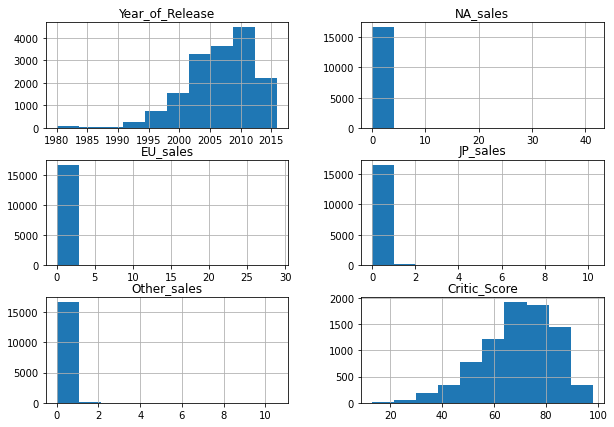

In [8]:
data.hist(figsize=(10, 7));

**Резюме:** построим графики для общей картины. Мы видим пропуски в столбцах Оценки критиков, Оценки пользователей и Рейтинг. Данные в колонке Года выпуска нужно перевести в date64. Дубликатов нет.

## Обработка данных

**Переименовываем столбцы**

In [9]:
data.columns = [x.lower() for x in data.columns]

In [10]:
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12431,Strike Force Bowling,GC,2005.0,Sports,0.05,0.01,0.0,0.0,47.0,tbd,E


**Замена типов данных**

In [11]:
data.loc[data['user_score'] =='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

**Обработка пропусков**

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Примичание**: В данном случае пропуски внутри ***жанра*** или ***рейтинга*** не подлежат заполнению. Поскольку в внутри каждого жанра на каждой платформе есть как очень успешные так и безнадежно провальные по оценкам критиков, а рейтинги не подчиняются каким-либо закономерностям, поэтому оставляем как есть.

<div style="border:solid Blue 2px; padding: 40px">
    
   
***Вывод***
    
 - Привели названия столбцов к нижнему регистру по pep8, 
 - В оценке пользователя заменили аббревиатуру ToBeDeterninated на np.nan 
 - Также заменили тип данных в этом столбце на число с плавающей точкой. 
 - Есть существенное число пропусков в столбцах оценка критиков, оценка пользователей и возрастной рейтинг. Эти данные заполнению не подлежат, так как носят индивидуальный характер.

## Исследовательский анализ

**Исследуем суммарные продажи во всех регионах**

In [18]:
data['total_sale_game'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### **Игры по годам выпуска**

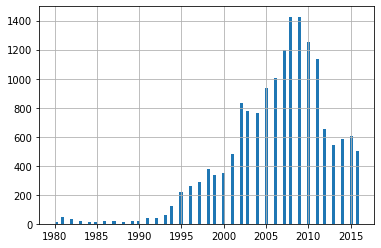

In [19]:
data['year_of_release'].where(data['year_of_release'] != 0).hist(bins=100);

In [20]:
data['year_of_release'].value_counts().head(11)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
Name: year_of_release, dtype: Int64

    Наибольшее число игр выпущены в период с 2006 по 2011 годы

### **Продажи по игровым платформам**

In [21]:
sum_platform_sale = data.pivot_table(index='platform', values='total_sale_game', aggfunc='count')
sum_platform_sale.sort_values(by='total_sale_game', ascending=False).head(11)

,total_sale_game
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


    Топ 10 платформ с наибольшим числом игровых продаж

### **За какой срок появлялись и исчезали новые платформы**

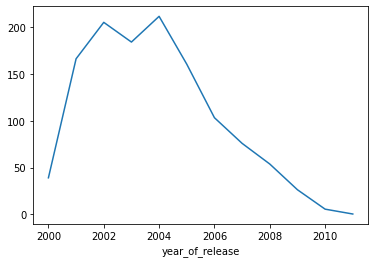

In [22]:
data[data['platform']=='PS2'].groupby('year_of_release')['total_sale_game'].sum().plot();

    PlayStation 2 появился в 00-х и достиг пика популярности в 2004 году и почти пропал к 10-му году.

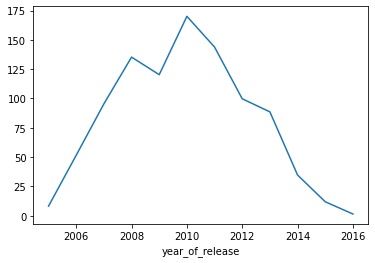

In [23]:
data[data['platform']=='X360'].groupby('year_of_release')['total_sale_game'].sum().plot();

    XBox 360 прожил на рынке 10 лет и пик популярности пришелся на 2010 год.

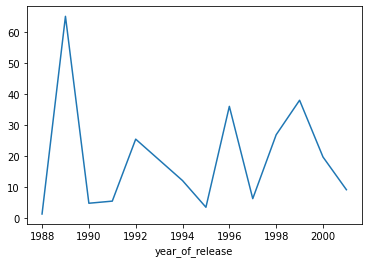

In [24]:
data[data['platform']=='GB'].groupby('year_of_release')['total_sale_game'].sum().plot();

    У GameBoy популярность скачет как на американских горках (расцвет продаж с 88 - 90-й)

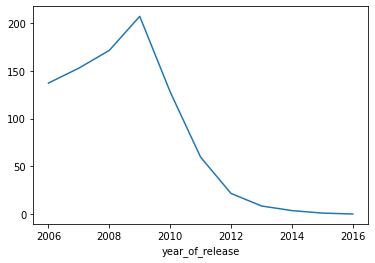

In [25]:
data[data['platform']=='Wii'].groupby('year_of_release')['total_sale_game'].sum().plot();

    Nintendo wii можно сказать прожил на рынке 6 лет, после 2012 года продажи больше не поднимались

<div style="border:solid Blue 2px; padding: 40px">    

***Вывод:*** 
    
- В среднем срок жизни игровой платформы на рынке 10 лет. Это связано с тем что игровой рынок очень динамичен с точки зрения выпуска и новых игр и новых платформ (новое покаление выпускается раз в 5-7 лет)
       
- Самый пиковый актуальный период нового релиза составляет в среднем 2-3 года. За это время тренды еще не отмирают, а значит мы может опитаться на данные последних лет для дальнейшей аналитической работы и прогнозирования


**Актуальный период** 2012-2016 год

In [26]:
data = data.query('year_of_release >= 2012')

In [27]:
data['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sale_game  2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


In [29]:
data.duplicated().sum()

0

### **Игры с наибольшими суммарными продажами**

In [30]:
data.sort_values('total_sale_game', ascending=False)[['name', 'platform', 'total_sale_game', 'year_of_release', 'genre', 'rating']].head(10)

,name,platform,total_sale_game,year_of_release,genre,rating
16,Grand Theft Auto V,PS3,21.05,2013,Action,M
23,Grand Theft Auto V,X360,16.27,2013,Action,M
31,Call of Duty: Black Ops 3,PS4,14.63,2015,Shooter,NaN
33,Pokemon X/Pokemon Y,3DS,14.60,2013,Role-Playing,NaN
34,Call of Duty: Black Ops II,PS3,13.79,2012,Shooter,M
35,Call of Duty: Black Ops II,X360,13.68,2012,Shooter,M
42,Grand Theft Auto V,PS4,12.62,2014,Action,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68,2014,Role-Playing,NaN
60,Call of Duty: Ghosts,X360,10.24,2013,Shooter,M
62,New Super Mario Bros. 2,3DS,9.90,2012,Platform,E


    Топ 10 игр с самыми высокими суммарными продажами

### Выберите несколько потенциально прибыльных платформ.

In [31]:
data.sort_values('total_sale_game', ascending=False)['platform'].head(4)

16     PS3
23    X360
31     PS4
33     3DS
Name: platform, dtype: object

    Платформы PS3, PS4, X360, 3DS являются лидерами продаж актуального периода. Рассмотрим популярность на графиках:

    PlayStation 4

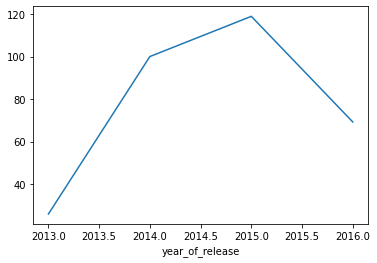

In [32]:
data[data['platform']=='PS4'].groupby('year_of_release')['total_sale_game'].sum().plot();

    Nintendo 3DS

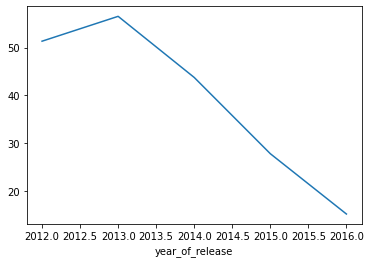

In [33]:
data[data['platform']=='3DS'].groupby('year_of_release')['total_sale_game'].sum().plot();

    XBox One

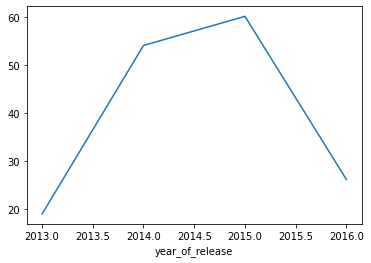

In [34]:
data[data['platform']=='XOne'].groupby('year_of_release')['total_sale_game'].sum().plot();

    PlayStation 3

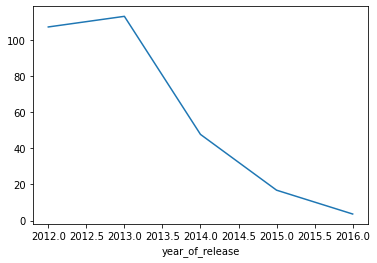

In [35]:
data[data['platform']=='PS3'].groupby('year_of_release')['total_sale_game'].sum().plot();

<div style="border:solid Blue 2px; padding: 40px">
    
     В предшествующем 2016 году наибольшими продажами обладали игры на платформе PS4, 3DS, XOne, но потенциально прибыльными можно назвать только две XOne и PS4 которые еще не отыграли свой 10-ти летний рыночный срок.

### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [3]:
#data.boxplot('total_sale_game', by='platform', figsize=(15, 8))

(0.0, 2.0)

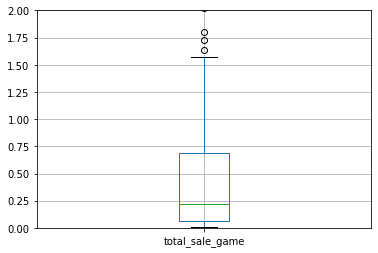

In [37]:
data.query('platform == "XOne"').boxplot('total_sale_game');
plt.ylim(0,2)


(0.0, 2.0)

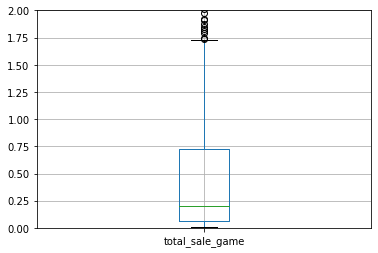

In [38]:
data.query('platform == "PS4"').boxplot('total_sale_game');
plt.ylim(0,2)

(0.0, 2.0)

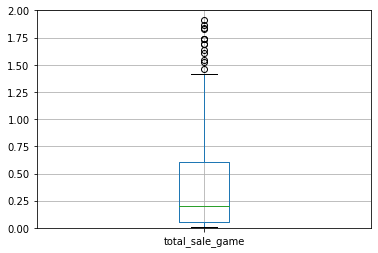

In [39]:
data.query('platform == "PS3"').boxplot('total_sale_game');
plt.ylim(0,2)

(0.0, 1.0)

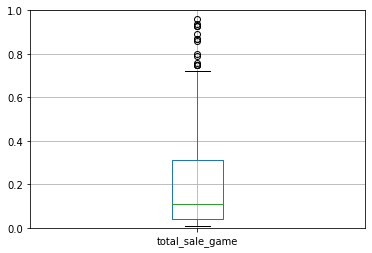

In [40]:
data.query('platform == "3DS"').boxplot('total_sale_game');
plt.ylim(0,1)

<div style="border:solid Blue 2px; padding: 40px">
    
-  Продажи всех актуальных платформ являются неоднородными что и показывает межквартильный размах, медиана у трех платформ на одном уровне. Но 3DS явно уступает в продажах платформам выше, медиана яано ниже, и верхний квартиль расположен вполовину ниже.

 ### Как влияют на продажи внутри одной платформы оценки критиков и пользователей. 
     Соотнесем выводы с продажами игр на других платформах.

    Рассмотрим на примере PlayStation4 и Xbox One

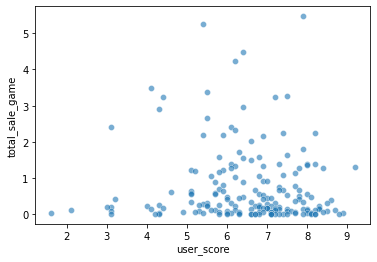

In [43]:
sns.scatterplot(data = data[data['platform']=='XOne'], y='total_sale_game', x='user_score', alpha=0.6);

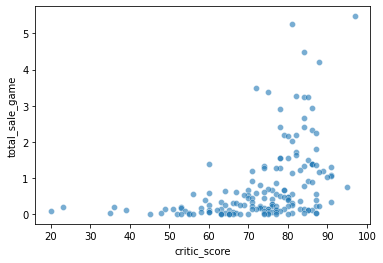

In [44]:
sns.scatterplot(data = data[data['platform']=='XOne'], y='total_sale_game', x='critic_score', alpha=0.6);

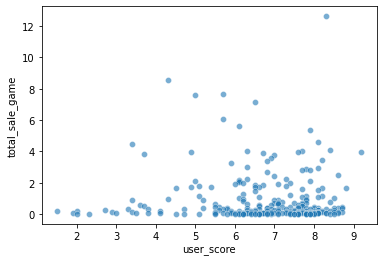

In [45]:
sns.scatterplot(data = data[data['platform']=='PS4'], y='total_sale_game', x='user_score', alpha=0.6);

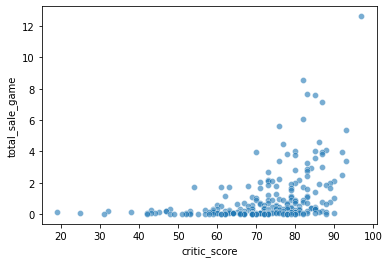

In [46]:
sns.scatterplot(data = data[data['platform']=='PS4'], y='total_sale_game', x='critic_score', alpha=0.6);

 <div style="border:solid Blue 2px; padding: 40px">
    
 - Из графиков видно что - Чем больше оценка критиков и пользователей тем больше продаж.

**Корреляция**

In [47]:
data.pivot_table(index='platform', values=['critic_score','total_sale_game'], aggfunc='sum').sort_values('critic_score', ascending=False)

,critic_score,total_sale_game
platform,,
PS4,18167.0,314.14
PS3,15315.0,288.79
PC,15016.0,62.65
XOne,12392.0,159.32
X360,12119.0,236.54
PSV,7632.0,49.18
3DS,7261.0,194.61
WiiU,6366.0,82.19
Wii,381.0,35.37


In [48]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sale_game
year_of_release,1.000000,-0.092848,-0.053163,-0.063587,-0.057375,0.014969,-0.019996,-0.083488
na_sales,-0.092848,1.000000,0.767484,0.271010,0.792277,0.290240,-0.014217,0.920981
eu_sales,-0.053163,0.767484,1.000000,0.265134,0.936906,0.283254,-0.022042,0.927487
jp_sales,-0.063587,0.271010,0.265134,1.000000,0.203078,0.116596,0.163980,0.450363
other_sales,-0.057375,0.792277,0.936906,0.203078,1.000000,0.272509,-0.010909,0.909525
critic_score,0.014969,0.290240,0.283254,0.116596,0.272509,1.000000,0.517727,0.308197
user_score,-0.019996,-0.014217,-0.022042,0.163980,-0.010909,0.517727,1.000000,0.004429
total_sale_game,-0.083488,0.920981,0.927487,0.450363,0.909525,0.308197,0.004429,1.000000


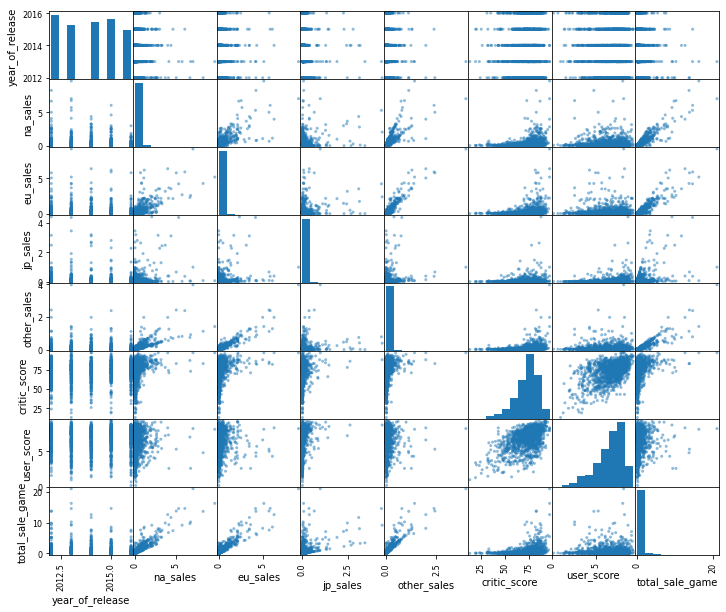

In [49]:
pd.plotting.scatter_matrix(data, figsize=(12, 10));

<div style="border:solid Blue 2px; padding: 40px">
    
***Вывод:*** 
    
- Изучив матрицу корреляции можно сказать продажи в Японии, Америке и Европе влияют друг на друга. 
- Оценки критиков и пользователей взаимосвязаны.

### Посмотрим на общее распределение игр по жанрам.

    Количество игр каждого жанра или выручка не лучшие индикаторы успешности (скорее просто показатель объема рынка) - поэтому возьмем медианные продажи как показатель что бы получить представление об успешности жанра

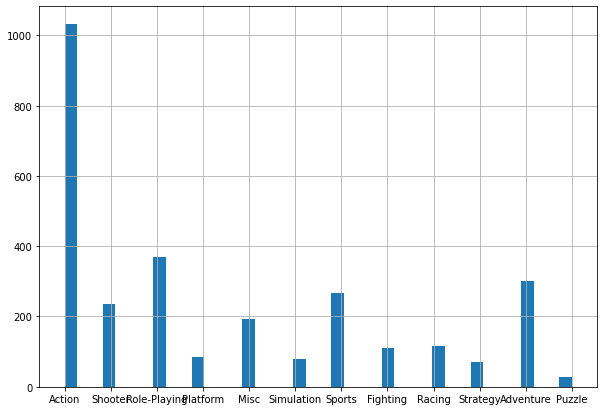

In [50]:
data['genre'].hist(figsize=(10, 7), bins=40);

    Самыми популярными на рынке (по медиане продаж) последние года являются:
  - Экшн, 
  - Ролевая игра 
  - Приключения
  
        Провальными можно считать жанры Паззл, Стратегия и Симуляция

In [51]:
data.pivot_table(index='genre', values='total_sale_game', aggfunc='median').sort_values('total_sale_game', ascending=False)

,total_sale_game
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


    Самые успешные в выручке игры (по медиане) жанра :
   - Шутер, 
   - Спорт,
   - Платформер.
   
           Провальные здесь также отмечены Паззл, Стратегия, Симуляция а также Приключения.

## Портрет пользователя

In [52]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale_game
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Для пользователя из Америки

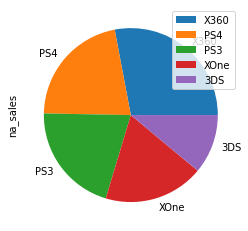

In [53]:
data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head().plot(y='na_sales', kind='pie');

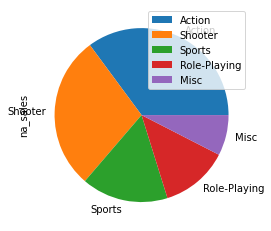

In [54]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head().plot(y='na_sales', kind='pie');

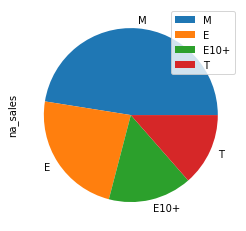

In [55]:
data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head().plot(y='na_sales', kind='pie');

<div style="border:solid Blue 2px; padding: 40px">
    
Американцы предпочитают:
- Xbox 360
- Экшн
- rating M (17+)

### Для пользователя из Японии

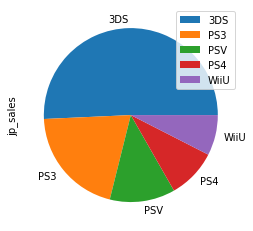

In [56]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head().plot(y='jp_sales', kind='pie');

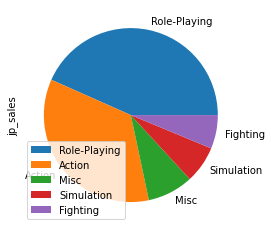

In [57]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head().plot(y='jp_sales', kind='pie');

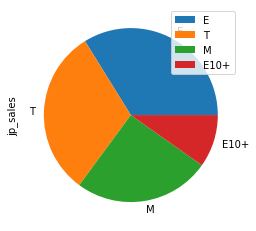

In [58]:
data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head().plot(y='jp_sales', kind='pie');

<div style="border:solid Blue 2px; padding: 40px">

Японцы предпочитают: 
- NintendoDS 
- Ролевая игра 
- для всех возрастных категорий rating E и тинейджеров T(13+)

### Для пользователя из Европы

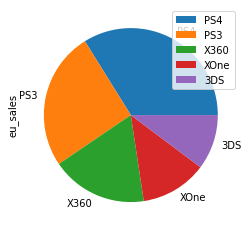

In [59]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head().plot(y='eu_sales', kind='pie');

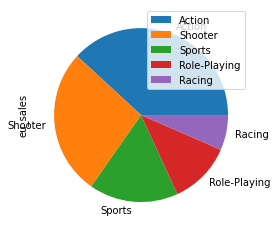

In [60]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head().plot(y='eu_sales', kind='pie');

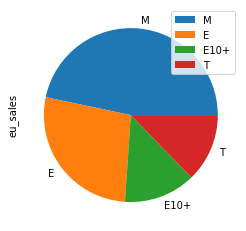

In [61]:
data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head().plot(y='eu_sales', kind='pie');

<div style="border:solid Blue 2px; padding: 40px">
Европейцы предпочитают:
    
- PlayStation4 
- Экшн 
- rating M (17+) 

## Гипотезы

In [62]:
data['user_score'] = data['user_score'].fillna(0)

In [63]:
data = data.query('user_score != 0.0')

In [64]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale_game
6547,Tokyo Jungle,PS3,2012,Action,0.00,0.00,0.26,0.00,74.0,8.4,T,0.26
1613,FIFA Street,PS3,2012,Sports,0.12,0.89,0.00,0.23,76.0,6.4,E,1.24
8059,LEGO Harry Potter: Years 5-7,PSV,2012,Action,0.07,0.07,0.00,0.03,64.0,6.8,E10+,0.17
8251,The Secret World,PC,2012,Role-Playing,0.07,0.08,0.00,0.02,74.0,8.2,M,0.17
10491,Blades of Time,X360,2012,Action,0.07,0.02,0.00,0.01,52.0,6.5,M,0.10


  
    H0 - Средние пользовательские рейтинги платформ Xbox One и PS4 равны
    H1 - Средние пользовательские рейтинги платформ Xbox One и PS4 не равны


### 1.Средние пользовательские рейтинги платформ Xbox One и PS одинаковые;

In [65]:
alpha = 0.05


result = st.ttest_ind(
    data[data['platform']=='X360']['user_score'],
    data[data['platform']=='PS4']['user_score'],
    equal_var=False)


In [66]:
result.pvalue

0.0001414683515144136

     Подтверждаем нулевую гипотезу. 

### 2.Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports (спортивные соревнования) разные.

  
    H0 - Средние пользовательские рейтинги жанров Action и Sports разные
    H1 - Средние пользовательские рейтинги платформ Action и Sports одинаковые

In [67]:
alpha = 0.05


result = st.ttest_ind(
    data[data['genre']=='Action']['user_score'],
    data[data['genre']=='Sports']['user_score'],
    equal_var=False)


In [68]:
print(result.pvalue)

4.24307776572644e-20


    Подтверждаем альтернативную гипотезу.

<div style="border:solid Blue 2px; padding: 40px">
<h1> Результат</h1>
     
    
- Предообработка данных включала в себя изменение некоторых типов данных (оценка пользователей - float, год релиза - int); название колонок привели в нижний регистр по pep8; далее добавили колонку по суммарным продажам total_sale_game, определили срок жизни игровой платформы(в среднем 10 лет); затем (по гистограмме) отфильтровали датасет по актуальному периоду, я выбрала 2012-2016 год. Теперь датасет может отвечать на более детальные вопросы.
       
- Проведя исследовательский анализ данных по магазину "Стримчик" выяснились определяющие успешность игры закономерности:
- Игра на платформе PlayStation4 и Xbox One (судя по гистограмме у американцев равнозначное отношение к xOne и x360)
- Игра в жанре Action являются самыми распрастраненными на рынке, но shooter, sport, platformer успешнее. (также средние пользовательские рейтинги игр в жанре экшн и спорт - одинаковые)
- Игра с возрастной категорией "M" интересуют пользователей больше.
- Если ориентироваться на японский рынок видеоигр - в таком случае нужно отдать предпочтение платформе NintendoDS, жанру  Role-play для всех возрастных категорий. 
    
Итог : 
-  В 2017 году можно сделать ставку на Shooter судя по медианной успешности жанра, (если не брать в расчет продажи в Японии - они не так сильно влияют на тотальные продажи по миру) 
- игру на платформе PS4 или XboxOne (поскольку гипотеза об одинаковом пользовательском рейтинге этих двух платформ подтвердилась), 
- возрастная категория может быть M и/или Е.
</div> 